Importing packages and creating the DataFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Mall_Customers.csv')

Elbow Methods

In [2]:
from sklearn.preprocessing import StandardScaler

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Age, Annual Income (k$), and Spending Score (1-100) as clustering features.

StandardScaler to ensure that each variable contributes equally to the clustering process.

In [3]:
import warnings
warnings.filterwarnings('ignore')
import os 
os.environ['OMP_NUM_THREADS'] = '1'

from sklearn.cluster import KMeans

K = range(1, 11)
inertia = []
distortion = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    inertia.append(kmeans.inertia_)
    distortion.append(np.mean(np.min(kmeans.transform(X_scaled), axis=1)))

Calculates Distortion and Inertia for different K-Means

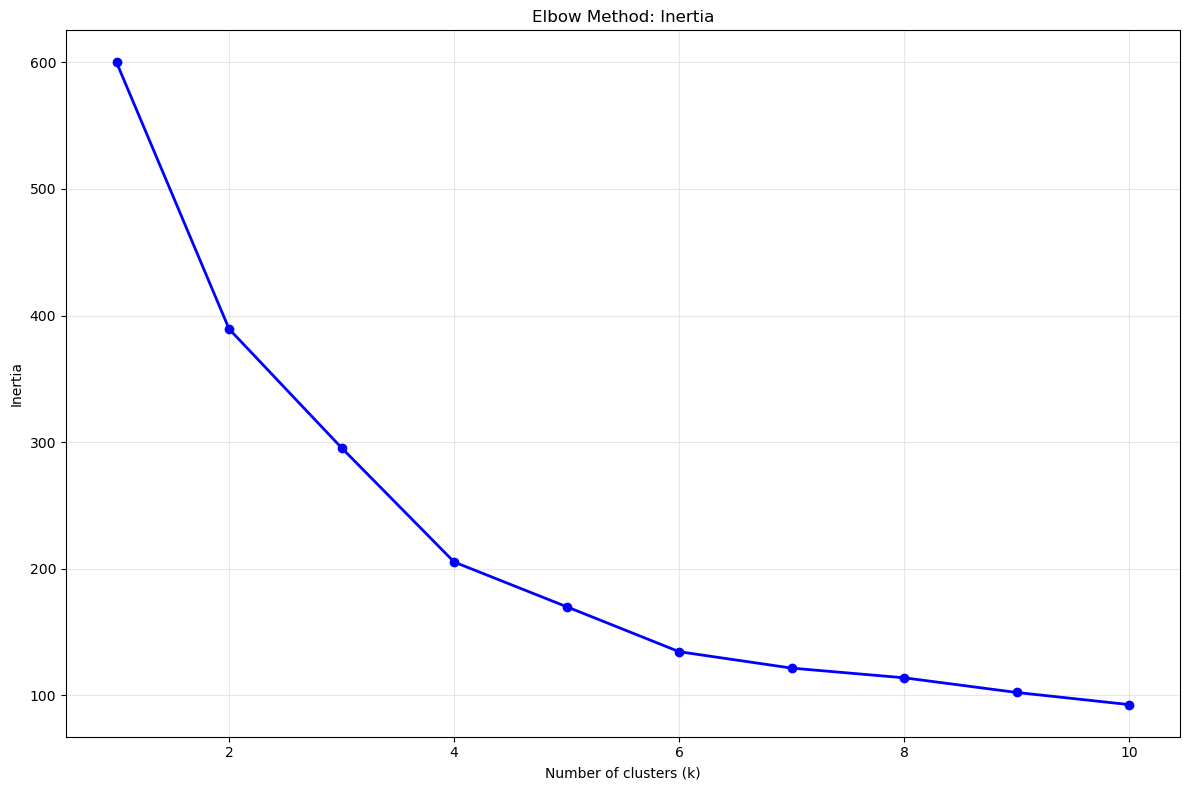

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(K, inertia, 'bo-', linewidth=2)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method: Inertia')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Inertia Elbow Method Plot Results

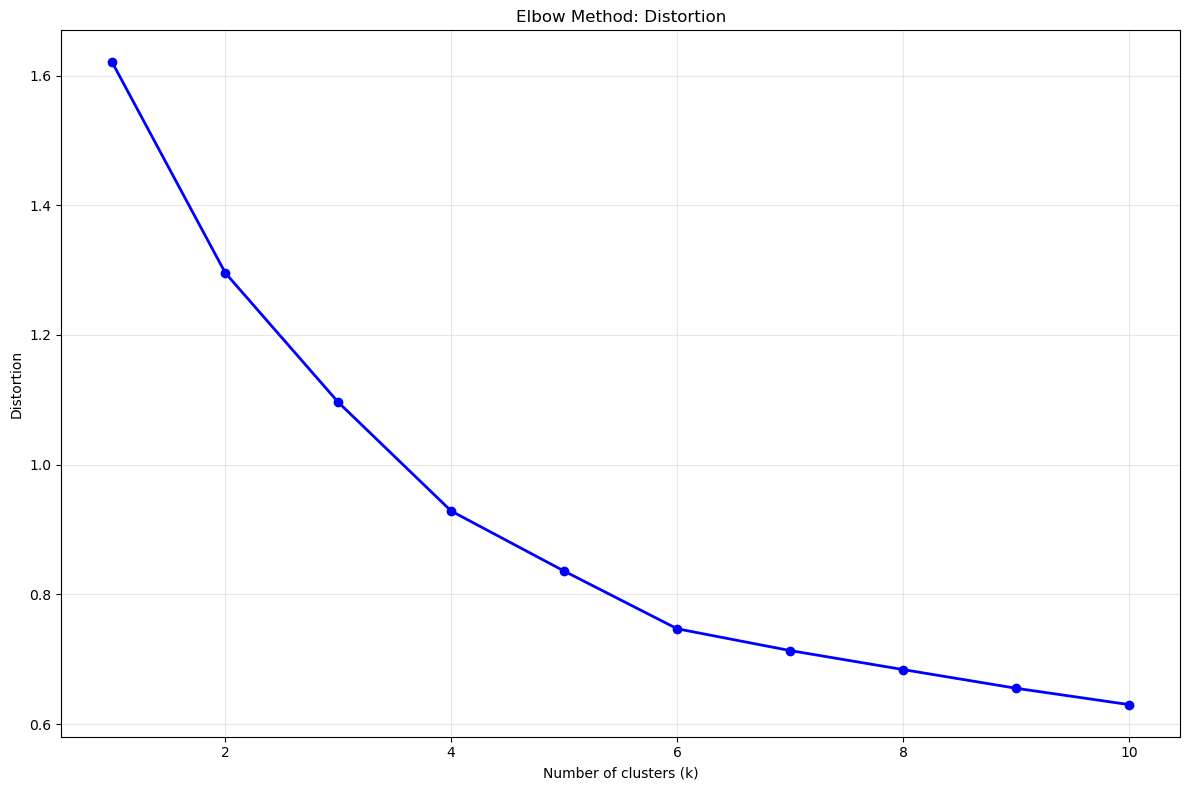

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bo-', linewidth=2)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method: Distortion')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Distortion Elbow Method Plot Results

Judging from Elbow Method Results: Optimal K is 5